In [111]:
#Ashish Tara Shivakumar Ireddy_Task 1 
#ISU: 331890

#Importing all Libs
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  learning_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import confusion_matrix, precision_recall_curve,  precision_recall_curve, auc, make_scorer

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [112]:
df = pd.read_csv('bioresponse.csv')
df
#importing Data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [113]:
#Creating a Copy
df_copy = df.iloc[:, 1:]
Act_Data = df[['Activity']]
Act_Data

,Activity
0,1
1,1
2,1
3,1
4,0
...,...
3746,1
3747,1
3748,0
3749,1


In [114]:
#Scaling Data and Making a copy for operation and verification
scaler = StandardScaler()
Scale_Data=scaler.fit_transform(df_copy)

Scale_Data

array([[-0.96211163, -0.90156647,  0.40633482, ..., -0.10894694,
        -0.14380637, -0.10641338],
       [ 3.62247289,  0.13089854, -0.23138983, ..., -0.10894694,
         6.95379487, -0.10641338],
       [-0.545748  , -1.06108805, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338],
       ...,
       [ 1.53857083, -0.67902883, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338],
       [ 0.2882296 ,  1.63642996, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338],
       [ 0.70501001, -0.55254143, -0.86911448, ..., -0.10894694,
        -0.14380637, -0.10641338]])

In [115]:
#Splitting Dataset 70-30 ratio 

x_train, x_test, y_train, y_test= train_test_split(Scale_Data, Act_Data, test_size=0.3, random_state=0)



Small Decision Tree :

    Precision:  0.7457142857142857
       Recall:  0.8298887122416534
     Accuracy:  0.7468916518650088
           F1:  0.7855530474040631
     Log Loss:  8.742179041644865

ROC Parameter:  0.7358699094407463


Text(0, 0.5, 'value')

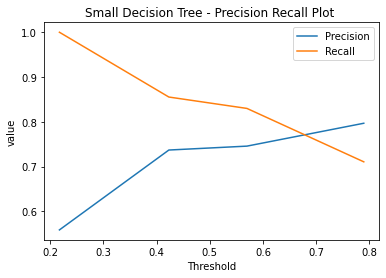

In [118]:
# Small Decision Tree and its metrics 

sdt = DecisionTreeClassifier(max_depth=2, random_state=0)
sdt.fit(x_train, y_train.values.ravel())

sdt_est = sdt.predict(x_test)



print("Small Decision Tree :")
print("\n    Precision: ", precision_score(y_test, sdt_est))
print("       Recall: ", recall_score(y_test, sdt_est))
print("     Accuracy: ", accuracy_score(y_test, sdt_est))
print("           F1: ", f1_score(y_test, sdt_est))
print("     Log Loss: ", log_loss(y_test, sdt_est))

sdt_roc = roc_auc_score(y_test, sdt_est)
print("\nROC Parameter: ", sdt_roc)

#---------------------------PLOTTING---------------------------------

sdt_predict = sdt.predict_proba(x_test)

pres, rcl, thresh = precision_recall_curve(y_test, sdt_predict[:,1])
plt.plot(thresh, pres[:-1], label = "Precision")
plt.plot(thresh, rcl[:-1], label = "Recall")
plt.title("Small Decision Tree - Precision Recall Plot ")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("value")

Deep Decision Tree :

    Precision:  0.7618296529968455
       Recall:  0.7678855325914149
     Accuracy:  0.7362344582593251
           F1:  0.7648456057007126
     Log Loss:  9.110246295293457

ROC Parameter:  0.7320312974828302


Text(0, 0.5, 'value')

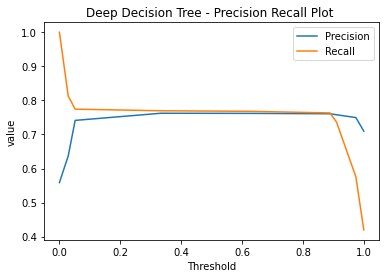

In [119]:
# Deep Decision Tree & its metrics 

ddt = DecisionTreeClassifier(max_depth=20, random_state=0)
ddt.fit(x_train, y_train.values.ravel())

ddt_est = ddt.predict(x_test)



print("Deep Decision Tree :")
print("\n    Precision: ", precision_score(y_test, ddt_est))
print("       Recall: ", recall_score(y_test, ddt_est))
print("     Accuracy: ", accuracy_score(y_test, ddt_est))
print("           F1: ", f1_score(y_test, ddt_est))
print("     Log Loss: ", log_loss(y_test, ddt_est))

ddt_roc = roc_auc_score(y_test, ddt_est)
print("\nROC Parameter: ", ddt_roc)

#---------------------------PLOTTING---------------------------------

ddt_predict = ddt.predict_proba(x_test)

pres1, rcl1, thresh1 = precision_recall_curve(y_test, ddt_predict[:,1])
plt.plot(thresh1, pres1[:-1], label = "Precision")
plt.plot(thresh1, rcl1[:-1], label = "Recall")
plt.title("Deep Decision Tree - Precision Recall Plot ")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("value")

Random Forest on Small Trees Result :

    Precision:  0.7170953101361573
       Recall:  0.753577106518283
     Accuracy:  0.6962699822380106
           F1:  0.7348837209302327
     Log Loss:  10.490595960727264

ROC Parameter:  0.6886597806233266


Text(0, 0.5, 'value')

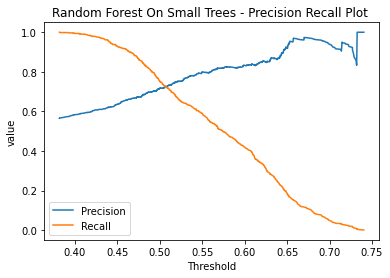

In [141]:
# Random Forest On Small Trees

rfst = RandomForestClassifier(n_estimators = 60, max_depth=2, random_state=0)
rfst.fit(x_train, y_train.values.ravel())

rfst_est = rfst.predict(x_test)



print("Random Forest on Small Trees Result :")
print("\n    Precision: ", precision_score(y_test, rfst_est))
print("       Recall: ", recall_score(y_test, rfst_est))
print("     Accuracy: ", accuracy_score(y_test, rfst_est))
print("           F1: ", f1_score(y_test, rfst_est))
print("     Log Loss: ", log_loss(y_test, rfst_est))

rfst_roc = roc_auc_score(y_test, rfst_est)
print("\nROC Parameter: ", rfst_roc)

#---------------------------PLOTTING---------------------------------

rfst_predict = rfst.predict_proba(x_test)

pres2, rcl2, thresh2 = precision_recall_curve(y_test, rfst_predict[:,1])
plt.plot(thresh2, pres2[:-1], label = "Precision")
plt.plot(thresh2, rcl2[:-1], label = "Recall")
plt.title("Random Forest On Small Trees - Precision Recall Plot ")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("value")

Random Forest on Small Trees Result :

    Precision:  0.8119935170178282
       Recall:  0.7965023847376789
     Accuracy:  0.783303730017762
           F1:  0.8041733547351524
     Log Loss:  7.484506388685712

ROC Parameter:  0.781550991161596


Text(0, 0.5, 'value')

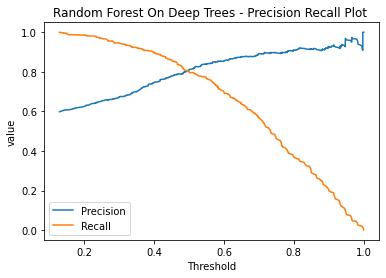

In [138]:
# Random Forest On Deep Trees

rfdt = RandomForestClassifier(n_estimators = 60, max_depth=20, random_state=0)
rfdt.fit(x_train, y_train.values.ravel())

rfdt_est = rfdt.predict(x_test)


print("Random Forest on Small Trees Result :")
print("\n    Precision: ", precision_score(y_test, rfdt_est))
print("       Recall: ", recall_score(y_test, rfdt_est))
print("     Accuracy: ", accuracy_score(y_test, rfdt_est))
print("           F1: ", f1_score(y_test, rfdt_est))
print("     Log Loss: ", log_loss(y_test, rfdt_est))

rfdt_roc = roc_auc_score(y_test, rfdt_est)
print("\nROC Parameter: ", rfdt_roc)

#---------------------------PLOTTING---------------------------------

rfdt_predict = rfdt.predict_proba(x_test)

pres3, rcl3, thresh3 = precision_recall_curve(y_test, rfdt_predict[:,1])
plt.plot(thresh3, pres3[:-1], label = "Precision")
plt.plot(thresh3, rcl3[:-1], label = "Recall")
plt.title("Random Forest On Deep Trees - Precision Recall Plot ")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("value")

       Small Decision Tree:  0.7358699094407463
        Deep Decision Tree:  0.7320312974828302
Random Forest + Small Tree:  0.6886597806233266
 Random Forest + Deep Tree:  0.781550991161596


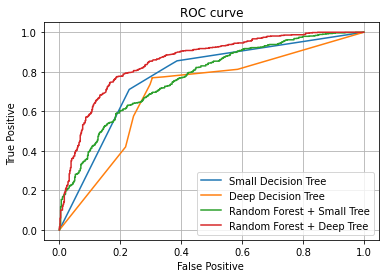

In [148]:
#COMBINED ROC Curve for all the ROC values respective to trees 

fls, tru, thrs = roc_curve(y_test, sdt_predict[:,1])
fls1, tru1, thrs1 = roc_curve(y_test, ddt_predict[:,1])
fls2, tru2, thrs2 = roc_curve(y_test, rfst_predict[:,1])
fls3, tru3, thrs3 = roc_curve(y_test, rfdt_predict[:,1])

plt.plot(fls, tru, label = "Small Decision Tree") 
plt.plot(fls1, tru1, label = "Deep Decision Tree")  
plt.plot(fls2, tru2, label = "Random Forest + Small Tree") 
plt.plot(fls3, tru3, label = "Random Forest + Deep Tree") 

plt.grid()
plt.xlabel("False Positive ")
plt.ylabel("True Positive ")
plt.title("ROC curve")
plt.legend()

print("       Small Decision Tree: ", sdt_roc)
print("        Deep Decision Tree: ", ddt_roc)
print("Random Forest + Small Tree: ", rfst_roc)
print(" Random Forest + Deep Tree: ", rfdt_roc)

In [171]:
#Creation of a Classifier that avoids False Negative (Type 2) Error & Metrics 

rdm = RandomForestClassifier(random_state=0)
rdm.fit(x_train, y_train.values.ravel())

rdm_predict = rdm.predict_proba(x_test)[:, 1]

rdm_pres, rdm_rcl, rdm_thrs = precision_recall_curve(y_test, rdm_predict)

def changer(rdm_predict, val):
    return [1 if y >= val else 0 for y in rdm_predict]

val=0.05

rdm_var = adjusted_classes(rdm_predict, val)

In [177]:
#Printing Metrics 
print("Metrics: ")
print("\n  Precision: ", precision_score(y_test, rdm_var))
print("     Recall: ", recall_score(y_test, rdm_var))
print("   Accuracy: " , accuracy_score(y_test, rdm_var))
print("         F1: ", f1_score(y_test, rdm_var))
print("   Log Loss: ", log_loss(y_test, rdm_var))

roc=roc_auc_score(y_test, rdm_var)

print("\n ROC Parameter: ", roc )

Metrics: 

  Precision:  0.5661566156615662
     Recall:  1.0
   Accuracy:  0.5719360568383659
         F1:  0.7229885057471265
   Log Loss:  14.785147094412347

 ROC Parameter:  0.5150905432595574


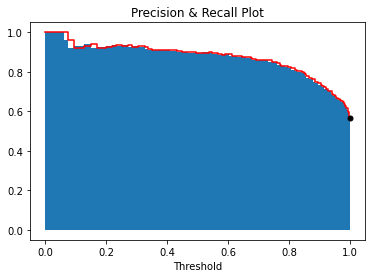

In [208]:
    #plotting the graph for the same
    plt.title("Precision & Recall Plot")
    plt.step(rdm_rcl, rdm_pres, color='r', alpha=1)
    plt.fill_between(rdm_rcl, rdm_pres, step='post')
    plt.xlabel("Threshold")    
    
    close_default_rdm = np.argmin(np.abs(rdm_thrs - val))
    plt.plot(rdm_rcl[close_default_rdm], rdm_pres[close_default_rdm], '.', color = 'black', markersize = 10) 